### Train Test Split

In [15]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
# Load and read the dataset
data = pd.read_csv("Advertising.csv", index_col = 0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [6]:
# Chck for null values
data.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [9]:
# Separate features from the target
X = data.drop("sales", axis = 1)
y = data["sales"]

In [10]:
# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [14]:
# check shape
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


In [16]:
# Scaling
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

In [17]:
# Train the model
model = LinearRegression()
model.fit(x_train_scaled, y_train)


LinearRegression()

In [19]:
# Model Prediction
y_pred = model.predict(x_test_scaled)

In [23]:
# Check actual against predictions
result = {
    "Actual": y_test,
    "Predicted": y_pred
}
pd.DataFrame(result).head()

,Actual,Predicted
96,16.9,16.408024
16,22.4,20.889882
31,21.4,21.553843
159,7.3,10.608503
129,24.7,22.112373


We can check for overfitting by looking at training score against the testing score

In [36]:
# Check how the model performed on the training dataset
print(f"{model.score(x_train_scaled, y_train): .3f}")

 0.896


In [38]:
# check the score on unseen data
print(f"{r2_score(y_test, y_pred): .3f}")

 0.899


Checking model performance

In [40]:
r2_score(y_test, y_pred)

0.899438024100912

In [41]:
mean_absolute_error(y_test, y_pred)

1.4607567168117597

In [44]:
mean_squared_error(y_test, y_pred)

3.174097353976104

In [45]:
mean_squared_error(y_test, y_pred, squared = False)

1.7815996615334502

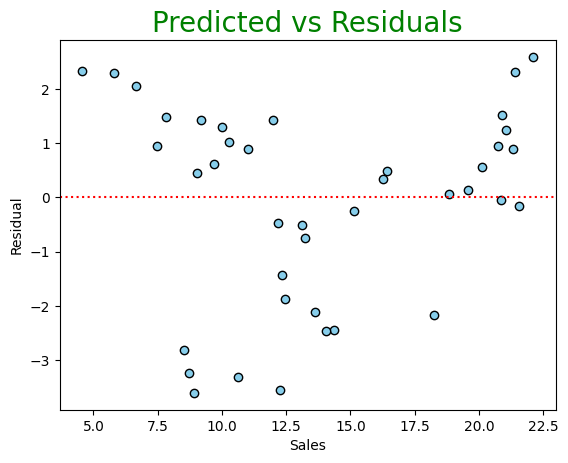

In [50]:
# Residuals

resd = y_test - y_pred

plt.scatter(y_pred, resd, edgecolors ="k", color = "skyblue")
plt.axhline(y = 0, color = "r", linestyle = "dotted")
plt.title("Predicted vs Residuals", fontsize = 20, color = "g")
plt.xlabel("Sales")
plt.ylabel('Residual');

# Cross Validation

In [51]:
from sklearn.model_selection import KFold, cross_val_score

In [53]:
# Create the KFold
model2 = LinearRegression()
kf = KFold(n_splits= 5, shuffle= True, random_state = 42)
score = cross_val_score(estimator = model2, X, y, cv = kf, scoring= "neg_mean_squared_error")

SyntaxError: positional argument follows keyword argument (3097495170.py, line 4)